In [731]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [732]:
D = 2000

In [733]:
begin_token = np.random.randn(D//2).astype(np.float32)
begin_token = np.concatenate([begin_token, np.zeros(D//2).astype(np.float32)])

In [734]:
A = np.random.randn(D//2).astype(np.float32)
B = np.random.randn(D//2).astype(np.float32)
C = np.random.randn(D//2).astype(np.float32)

A = np.concatenate([A, np.zeros(D//2)])
B = np.concatenate([B, np.zeros(D//2)])
C = np.concatenate([C, np.zeros(D//2)])
A

array([ 0.42856061, -1.04795492,  1.07990241, ...,  0.        ,
        0.        ,  0.        ])

In [735]:
dic = {
    'b': begin_token,
    'A': A,
    'B': B,
    'C': C
}

In [736]:
def string_to_token(s):
    for c in s:
        print(dic[c])
    return np.array([dic[c] for c in s]).astype(np.float32)

In [771]:
string_seq = ['b', 'C', 'B', 'A', 'C', 'A','A','A','C']

In [772]:
S = np.array(string_to_token(string_seq), dtype=np.float32)
T = len(S)
S.shape

[ 1.2404019  -0.5899514  -0.37258178 ...  0.          0.
  0.        ]
[ 0.5137639   0.70383841 -1.39076018 ...  0.          0.
  0.        ]
[ 0.2012132  -0.29142088  0.36351487 ...  0.          0.
  0.        ]
[ 0.42856061 -1.04795492  1.07990241 ...  0.          0.
  0.        ]
[ 0.5137639   0.70383841 -1.39076018 ...  0.          0.
  0.        ]
[ 0.42856061 -1.04795492  1.07990241 ...  0.          0.
  0.        ]
[ 0.42856061 -1.04795492  1.07990241 ...  0.          0.
  0.        ]
[ 0.42856061 -1.04795492  1.07990241 ...  0.          0.
  0.        ]
[ 0.5137639   0.70383841 -1.39076018 ...  0.          0.
  0.        ]


(9, 2000)

In [773]:
# creat 4 positionnal embeddings
P = np.random.randn(T, D//2).astype(np.float32)
P = np.concatenate([P,np.zeros((T, D//2))], axis=1)

In [774]:
X =  P +S

In [775]:
QK = np.zeros((D,D), dtype=np.float32)
for i in range(1, T):
    QK = QK + (P[i].reshape(D, 1) @ P[i-1].reshape(1, D))
QK

array([[-2.00473429,  1.34881159,  5.66768504, ...,  0.        ,
         0.        ,  0.        ],
       [-1.86910864,  0.06625355, -1.30686203, ...,  0.        ,
         0.        ,  0.        ],
       [ 4.72420144, -5.24936826, -0.70996342, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [776]:
# get attention matrix
Att = X @ QK @ (X.T)/ np.linalg.norm(X @ QK @ (X.T)) * 100
Att.shape

(9, 9)

In [777]:
def softmax(x, axis=None):
    x_max = np.max(x, axis=axis, keepdims=True)
    e_x = np.exp(x - x_max)
    return e_x / np.sum(e_x, axis=axis, keepdims=True)


In [778]:
Att = softmax(Att, axis=1)

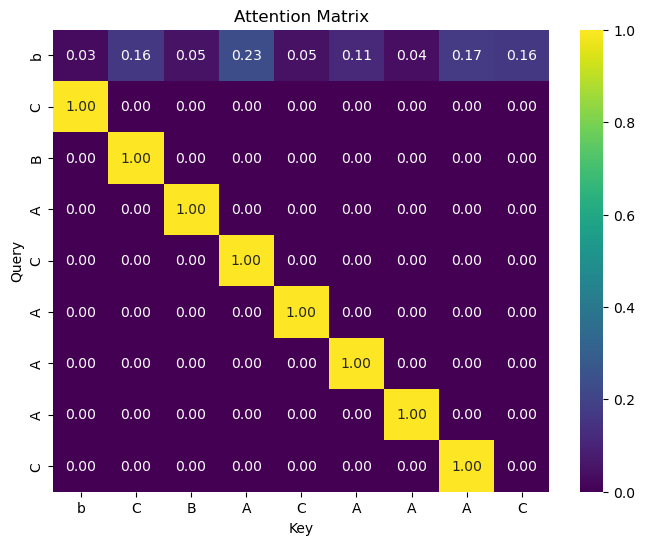

In [779]:
plt.figure(figsize=(8, 6))
sns.heatmap(Att, annot=True, fmt=".2f", cmap="viridis",
            xticklabels=string_seq, yticklabels=string_seq)
plt.title("Attention Matrix")
plt.xlabel("Key")
plt.ylabel("Query")
plt.show()


In [780]:
def permutation_matrix(D):
    assert D % 2 == 0, "D doit être pair"
    d_half = D // 2
    V = np.zeros((D, D))

    # Remplit les blocs pour permuter les deux moitiés
    V[:d_half, d_half:] = np.eye(d_half)  # Haut droit
    V[d_half:, :d_half] = np.eye(d_half)  # Bas gauche

    return V

V = permutation_matrix(D)


In [781]:
(X[1]@V) @A

0.0

In [782]:
Z = Z = (Att @ X @ V)/np.linalg.norm(Att @ X @ V)+X/np.linalg.norm(X)
Z.shape

(9, 2000)

In [783]:
K_2 = np.zeros((D, D), dtype=np.float32)
K_2[:D//2, D//2:] = np.eye(D//2)  # Bas gauche

In [784]:
Att2 = Z @ (K_2) @ (Z.T) *100
Att2.shape

(9, 9)

In [785]:
Z[3] @ (V@B)

7.149004077413446

In [786]:
Att2 = softmax(Att2, axis=1)

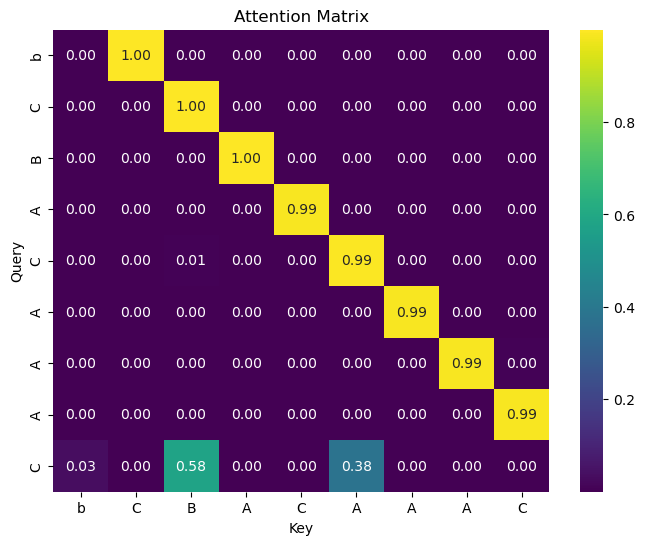

In [787]:
plt.figure(figsize=(8, 6))
sns.heatmap(Att2, annot=True, fmt=".2f", cmap="viridis",
            xticklabels=string_seq, yticklabels=string_seq)
plt.title("Attention Matrix")
plt.xlabel("Key")
plt.ylabel("Query")
plt.show()
